In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [15]:
data = pd.read_excel("test.xlsx")
data.head()

,hour,date_miladi,date_shamsi,code,unit_no,fuel_type,mvar,temp,moisture,power
0,1,2020-01-13,1398/10/23,SO,1,A,11,3,94,119
1,2,2020-01-13,1398/10/23,SO,1,A,11,3,96,119
2,3,2020-01-13,1398/10/23,SO,1,A,10,2,95,120
3,4,2020-01-13,1398/10/23,SO,1,A,11,2,95,120
4,5,2020-01-13,1398/10/23,SO,1,A,11,2,95,121


In [16]:
data=data[data["power"]>100]
data.shape

(756, 10)

In [17]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['date_shamsi', 'code', 'fuel_type']


In [18]:
# print categorical variables containing missing values
cat1 = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[cat1].isnull().sum())


fuel_type    248
dtype: int64


In [19]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
code             0
unit_no          0
fuel_type      248
mvar             0
temp             0
moisture         0
power            0
dtype: int64

In [20]:
data['fuel_type'].value_counts()

A    508
Name: fuel_type, dtype: int64

In [21]:
# Change object to integer:
data["fuel_type"][data["fuel_type"]=="A"] = 1 
data["fuel_type"][data["fuel_type"]=="B"] = 2
data["fuel_type"][data["fuel_type"]=="C"] = 3 

<ipython-input-21-57e8e137ba12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["fuel_type"][data["fuel_type"]=="B"] = 2
<ipython-input-21-57e8e137ba12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["fuel_type"][data["fuel_type"]=="C"] = 3


In [22]:
data['fuel_type'].value_counts()

1    508
Name: fuel_type, dtype: int64

In [23]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
code             0
unit_no          0
fuel_type      248
mvar             0
temp             0
moisture         0
power            0
dtype: int64

In [24]:
data["fuel_type"].fillna(method='bfill', inplace=True)

In [25]:
data.isnull().sum()

hour           0
date_miladi    0
date_shamsi    0
code           0
unit_no        0
fuel_type      0
mvar           0
temp           0
moisture       0
power          0
dtype: int64

In [26]:
X = data[["moisture","unit_no","fuel_type","temp"]]
y = data["power"]
y

0      119
1      119
2      120
3      120
4      121
      ... 
994    110
995    127
996    127
997    124
998    126
Name: power, Length: 756, dtype: int64

In [27]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,moisture,unit_no,fuel_type,temp
0,1.466945,-1.312566,0.0,-0.966274
1,1.536991,-1.312566,0.0,-0.966274
2,1.501968,-1.312566,0.0,-1.162330
3,1.501968,-1.312566,0.0,-1.162330
4,1.501968,-1.312566,0.0,-1.162330
...,...,...,...,...
751,-1.615098,0.551258,0.0,1.386393
752,-1.545052,0.551258,0.0,1.582449
753,-1.089750,0.551258,0.0,1.974560
754,-1.439982,0.551258,0.0,2.170615


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
# Apply PCA to reduce the number of features to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

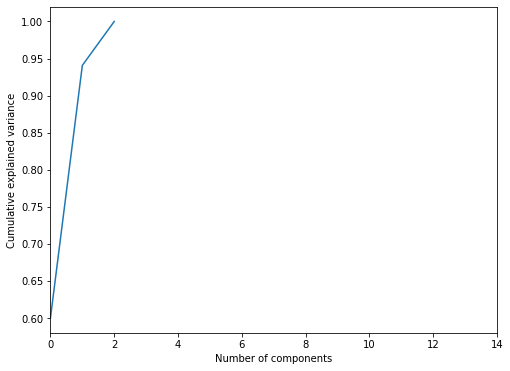

In [30]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

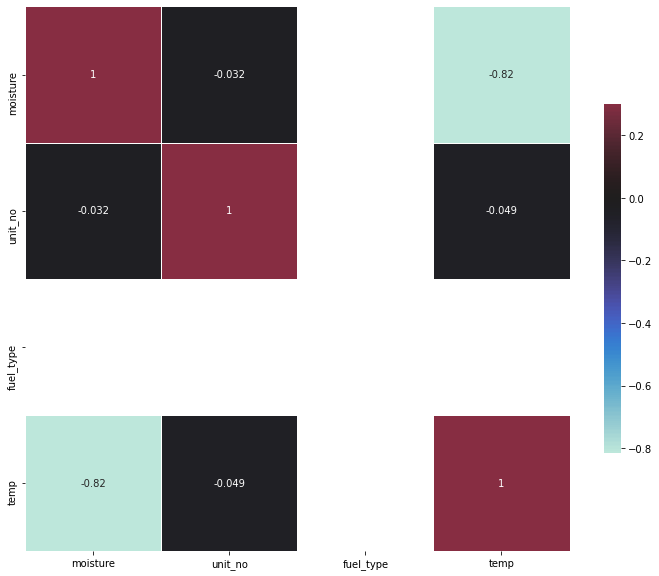

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [32]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.60004447 0.34071094 0.05924458 0.        ]

['moisture', 'unit_no', 'fuel_type', 'temp']
[[-0.70613766 -0.01546001 -0.          0.70790578]
 [-0.05907624  0.99756223 -0.         -0.03714285]
 [-0.70560584 -0.06804837 -0.         -0.70532958]
 [ 0.          0.         -1.          0.        ]]


In [33]:
dim_r = PCA(n_components=2)
dim_r.fit(X_train)
transformed = dim_r.transform(X_train)

In [34]:
transformed

array([[-1.4630685 ,  0.54267163],
       [-1.61313518, -0.95923652],
       [ 2.45295789, -1.27480049],
       ...,
       [ 0.95753973,  1.26313955],
       [-1.40208018, -0.19690273],
       [-0.36380673, -1.35930774]])

In [35]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.60004447 0.34071094 0.05924458 0.        ]

['moisture', 'unit_no', 'fuel_type', 'temp']
[[-0.70613766 -0.01546001 -0.          0.70790578]
 [-0.05907624  0.99756223 -0.         -0.03714285]
 [-0.70560584 -0.06804837 -0.         -0.70532958]
 [ 0.          0.         -1.          0.        ]]


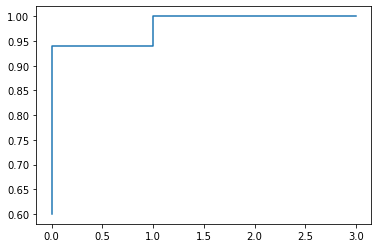

In [36]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

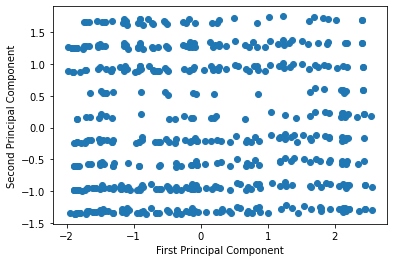

In [37]:
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [38]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_samples = pca.transform(X_train)
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1
0,-1.463068,0.542672
1,-1.613135,-0.959237
2,2.452958,-1.274800
3,-1.316589,-0.599875
4,0.883823,-1.330503


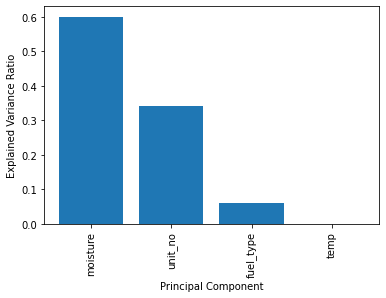

In [39]:
# Perform PCA
pca = PCA()
pca.fit(X_train)

# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Plot a bar chart of the explained variance ratio
feature_names = list(X_train.columns)
# Plot a bar chart of the explained variance ratio with feature names
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio)
plt.xticks(range(1, len(feature_names)+1), feature_names, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

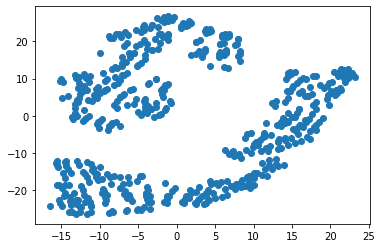

In [40]:
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_train)
plt.scatter(X_tsne[:,0], X_tsne[:,1]) 
plt.show()

In [41]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42) 
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
sorted_features = feature_importances.sort_values('importance', ascending=False)
print(sorted_features['feature'])

0     moisture
3         temp
1      unit_no
2    fuel_type
Name: feature, dtype: object


In [42]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
y_pred=regressor.predict(X_test)
y_pred.shape

(227,)

In [44]:
y_pred

array([109.        , 127.        , 125.        , 110.        ,
       125.        , 110.        , 120.        , 114.66666667,
       109.        , 114.        , 109.        , 110.        ,
       108.        , 116.        , 116.        , 125.        ,
       115.        , 130.        , 132.        , 133.        ,
       118.        , 128.        , 131.        , 125.        ,
       118.        , 118.        , 125.        , 147.        ,
       114.        , 116.        , 108.        , 148.        ,
       125.        , 131.        , 125.        , 115.        ,
       119.        , 116.        , 128.        , 127.        ,
       132.        , 114.        , 125.        , 138.        ,
       137.        , 140.        , 130.        , 110.        ,
       119.        , 115.        , 147.        , 110.        ,
       110.        , 110.        , 146.        , 118.        ,
       118.        , 110.        , 127.        , 125.        ,
       125.        , 148.        , 140.        , 114.  

In [45]:
y_test.shape

(227,)

In [46]:
y_test

853    103
957    128
551    125
79     138
575    125
      ... 
363    146
611    132
830    110
226    118
385    124
Name: power, Length: 227, dtype: int64